# Imbalanced Learning

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

### Chech imbalanced variables

In [4]:
df = pd.read_csv('imbd_log.csv')

In [5]:
df.dtypes

originalTitle          object
rating                 object
startYear               int64
runtimeMinutes        float64
awardWins             float64
numVotes              float64
totalImages           float64
totalVideos           float64
totalCredits            int64
criticReviewsTotal    float64
titleType              object
AwNmExWins            float64
canHaveEpisodes         int64
isAdult                 int64
numRegions              int64
userReviewsTotal      float64
countryOfOrigin        object
genres                 object
castNumber            float64
companiesNumber       float64
averageRating         float64
regions                object
externalLinks         float64
writerCredits         float64
directorsCredits      float64
soundMixes             object
quotesTotal           float64
dtype: object

In [6]:
del df['originalTitle']
del df['rating']
del df['titleType']
del df['countryOfOrigin']
del df['genres']
del df['regions']
del df['soundMixes']

In [7]:
df.describe()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,averageRating,externalLinks,writerCredits,directorsCredits,quotesTotal
count,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000,149531.000000
mean,1994.939852,41.569347,0.099687,3.843752,1.155595,0.076818,57.619009,0.365308,0.116483,0.072406,0.018277,2.846554,0.567929,2.388139,1.327260,6.874827,0.860424,0.866614,0.604886,0.228257
std,24.890965,47.171583,0.383815,1.669577,1.147780,0.307686,154.168251,0.804314,0.430053,0.259160,0.133952,5.295663,0.994824,1.090351,0.933756,1.348353,1.075712,0.663915,0.346778,0.659589
min,1878.000000,0.000000,0.000000,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,0.000000,0.000000,2.564949,0.693147,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.791759,0.693147,6.100000,0.000000,0.000000,0.693147,0.000000
50%,1999.000000,30.000000,0.000000,3.367296,0.693147,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.564949,1.098612,7.100000,0.693147,0.693147,0.693147,0.000000
75%,2015.000000,73.000000,0.000000,4.682131,1.609438,0.000000,64.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.693147,3.091042,1.791759,7.800000,1.386294,1.386294,0.693147,0.000000
max,2024.000000,5220.000000,6.102559,14.896614,9.932415,6.969791,25218.000000,6.444131,6.478510,1.000000,1.000000,100.000000,9.331673,9.273315,6.393591,10.000000,6.613384,3.951244,4.077537,6.989335


In [8]:
ctr = Counter(df['canHaveEpisodes'])
ctr

Counter({0: 138704, 1: 10827})

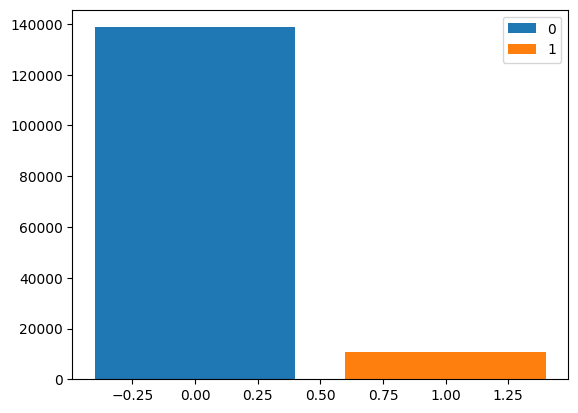

In [9]:
plt.bar(ctr.keys(), ctr.values(), label=ctr.keys(), color=['tab:blue', 'tab:orange'])
plt.legend()
plt.show()

# Undersampling

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, df['canHaveEpisodes'], test_size=0.3, random_state=100, stratify=df['canHaveEpisodes'])

In [12]:
# !pip install imblearn

In [13]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours

### RandomUnderSampler

In [14]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7579, 1: 7579})


In [15]:
def plot_pca(X_pca, y_train):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
    plt.show()

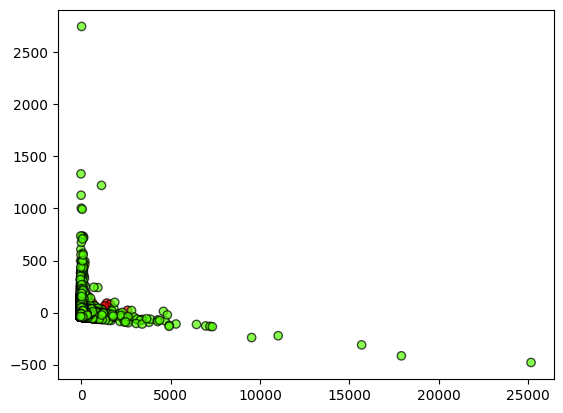

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

### CondensedNearestNeighbour

In [17]:
import warnings
warnings.simplefilter("ignore")

In [18]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

KeyboardInterrupt: 

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

### Tomek Links

In [19]:
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 96309, 1: 7579})


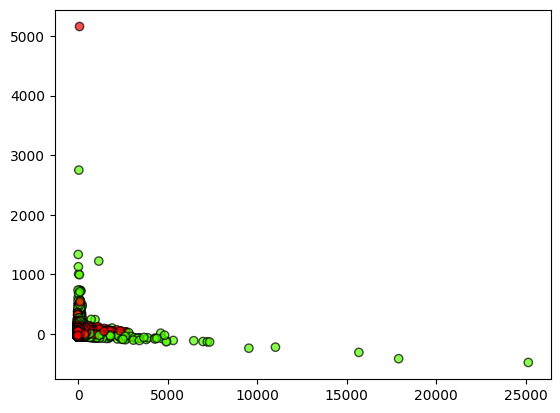

In [20]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

### Edited Nearest Neighbors

In [21]:
enn = EditedNearestNeighbours()
X_res, y_res = enn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 91756, 1: 7579})


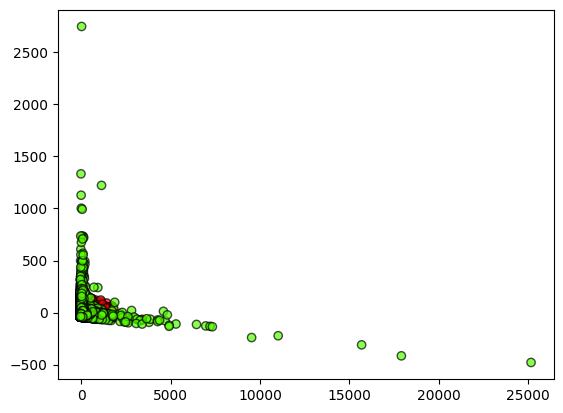

In [22]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

### Cluster Centroids

In [23]:
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

In [25]:
cc = ClusterCentroids(
    estimator=MiniBatchKMeans(n_init=1, random_state=0), random_state=42
)
X_res, y_res = cc.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 7579, 1: 7579})


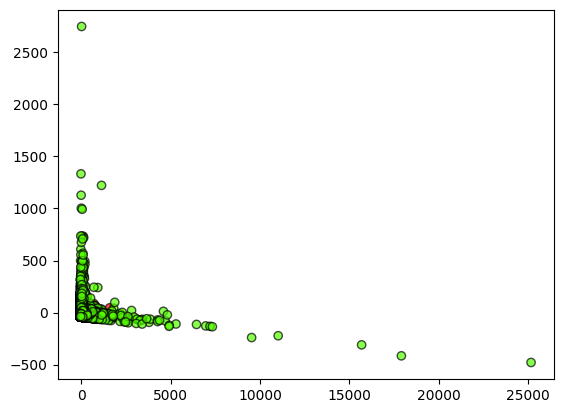

In [26]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

# Oversampling

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### RandomOverSampler

In [28]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 97092, 1: 97092})


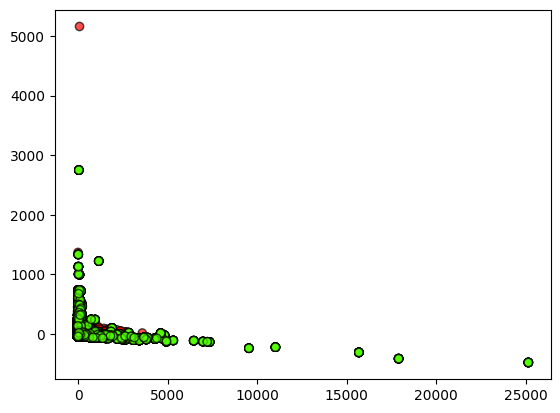

In [29]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

### SMOTE

In [30]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 97092, 1: 97092})


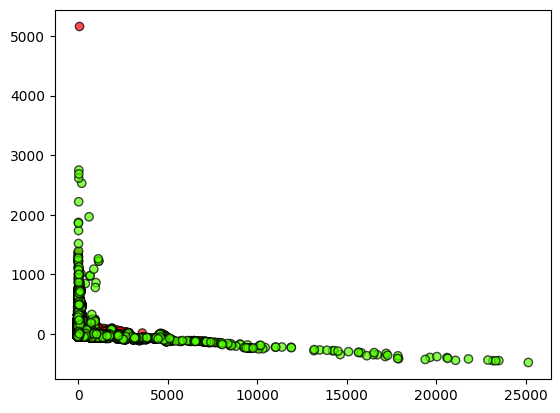

In [31]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)

### ADASYN

In [33]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 97092, 1: 97030})


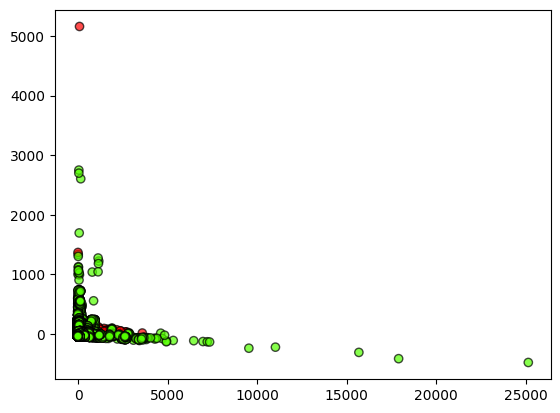

In [34]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)
plot_pca(X_pca, y_res)